# **Import libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Dictionary for Market Segmentation:

1.    spending: Amount spent by the customer per month (in 1000s)
2.    advance_payments: Amount paid by the customer in advance by cash (in 100s)
3.   probability_of_full_payment: Probability of payment done in full by the customer to the bank
4.    current_balance: Balance amount left in the account to make purchases (in 1000s)
5.    credit_limit: Limit of the amount in credit card (10000s)
6.    min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7.    max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


In [3]:
rd = pd.read_csv(r'bank_marketing_part1_Data.csv')

rd.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### **Univariate Analysis**

In [4]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
rd.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [6]:
rd.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [7]:
rd.duplicated().sum()

0

Normality test for spending
Statitics = 0.933, p value = 0.000


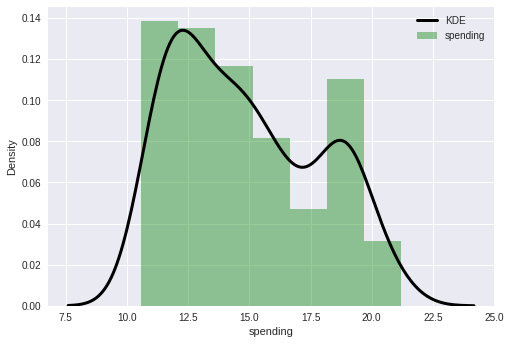

spending is not normally distributed.

Normality test for advance_payments
Statitics = 0.936, p value = 0.000


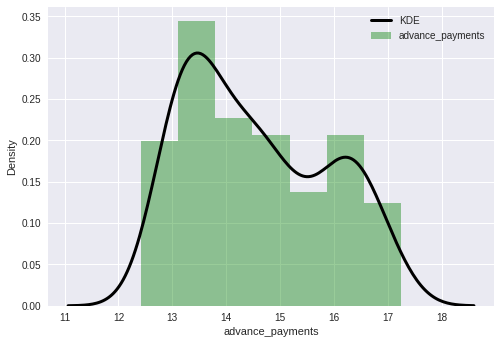

advance_payments is not normally distributed.

Normality test for probability_of_full_payment
Statitics = 0.973, p value = 0.000


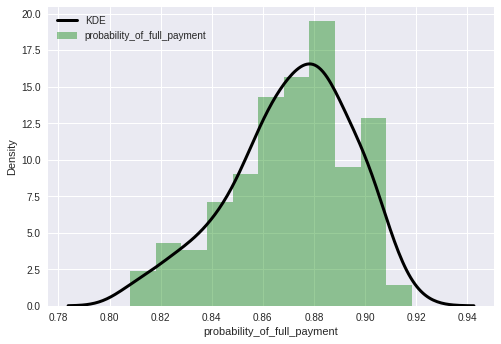

probability_of_full_payment is not normally distributed.

Normality test for current_balance
Statitics = 0.944, p value = 0.000


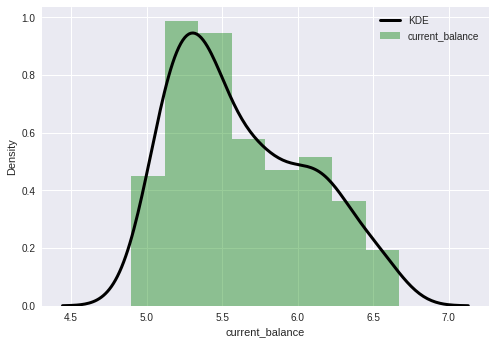

current_balance is not normally distributed.

Normality test for credit_limit
Statitics = 0.961, p value = 0.000


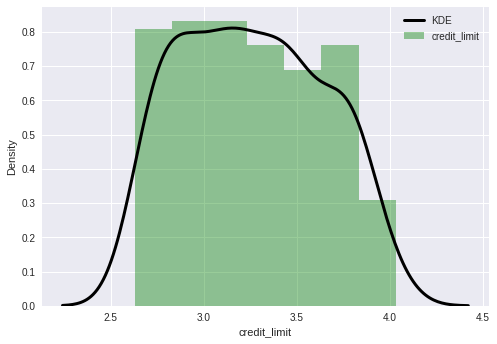

credit_limit is not normally distributed.

Normality test for min_payment_amt
Statitics = 0.984, p value = 0.015


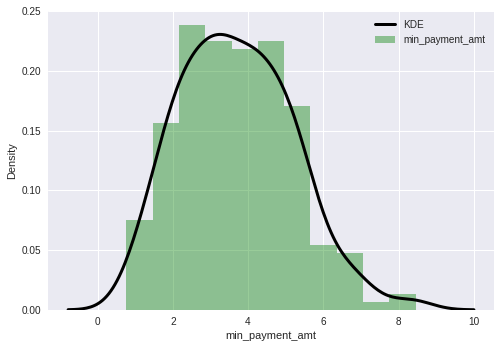

min_payment_amt is not normally distributed.

Normality test for max_spent_in_single_shopping
Statitics = 0.925, p value = 0.000


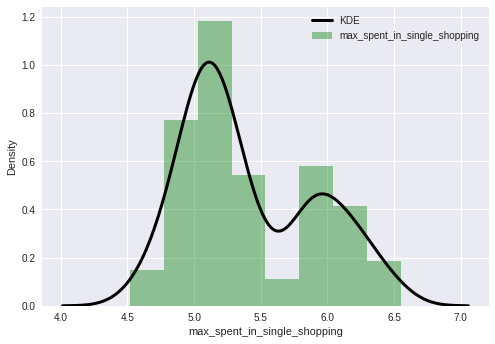

max_spent_in_single_shopping is not normally distributed.



In [8]:
from scipy.stats import shapiro as shapiro

for feature in rd.columns:
    stats, p_val = shapiro(rd[feature])
    print('Normality test for', feature)
    print('Statitics = %.3f, p value = %.3f' % (stats, p_val))
    sns.distplot(rd[feature],hist_kws = {'color':'g', 'label':feature},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
    plt.legend()
    plt.show()
    if p_val > 0.05:
        print(feature, 'is normally distribution and has Gaussian curve.\n')
    else:
        print(feature, 'is not normally distributed.\n')

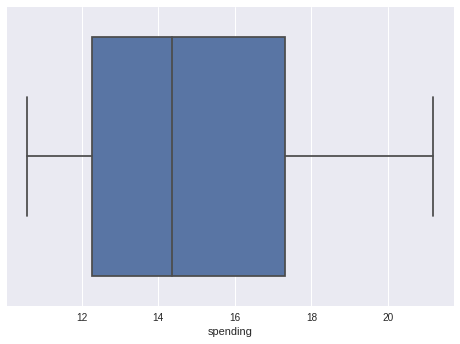

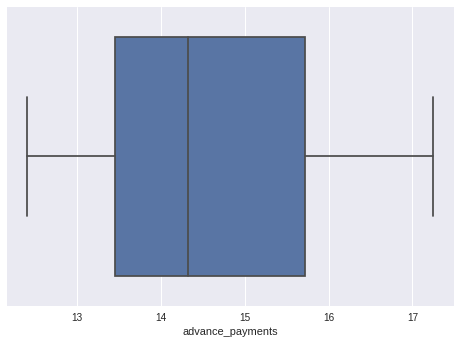

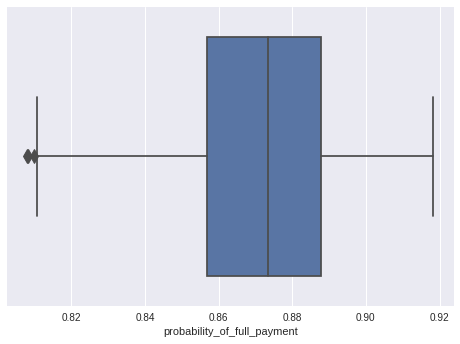

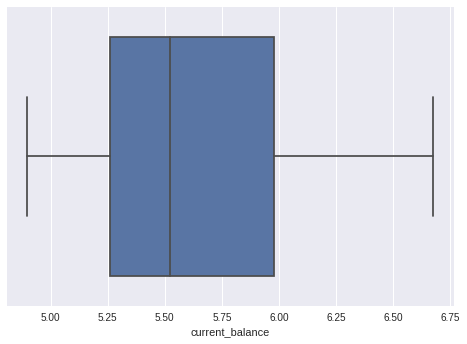

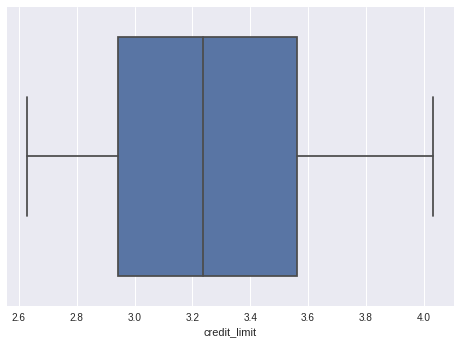

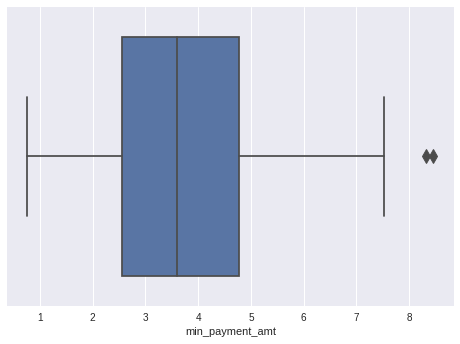

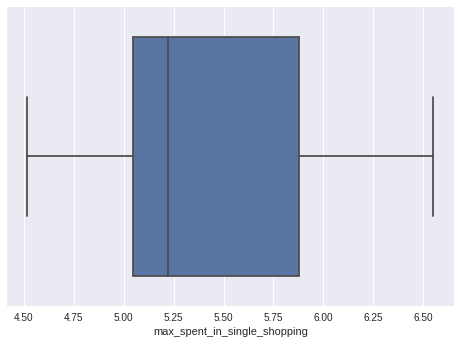

In [9]:
figsize=(10,4)
for feature in rd.columns:
    sns.boxplot(rd[feature],fliersize=10)
    plt.show()

### **Observations based on Univariate analysis of the data**

1. There are 210 records(observations) in the data
2. There are 7 independent features and all of them are non-NULL values
3. The data type of the all the features is **float** which is consistent with the explainations provided in the data dictionary
4. None of the features are normally distributed. This can be asserted via following test results

 * Shapiro-Wilk test
 * Distribution curve
 * Skewness stats

5. Except for a couple of data points for **min_payment_amt**, none of the features has any outlier data points
6. There where no duplicate observations in the dataset provided

### **Multivariate Analysis**

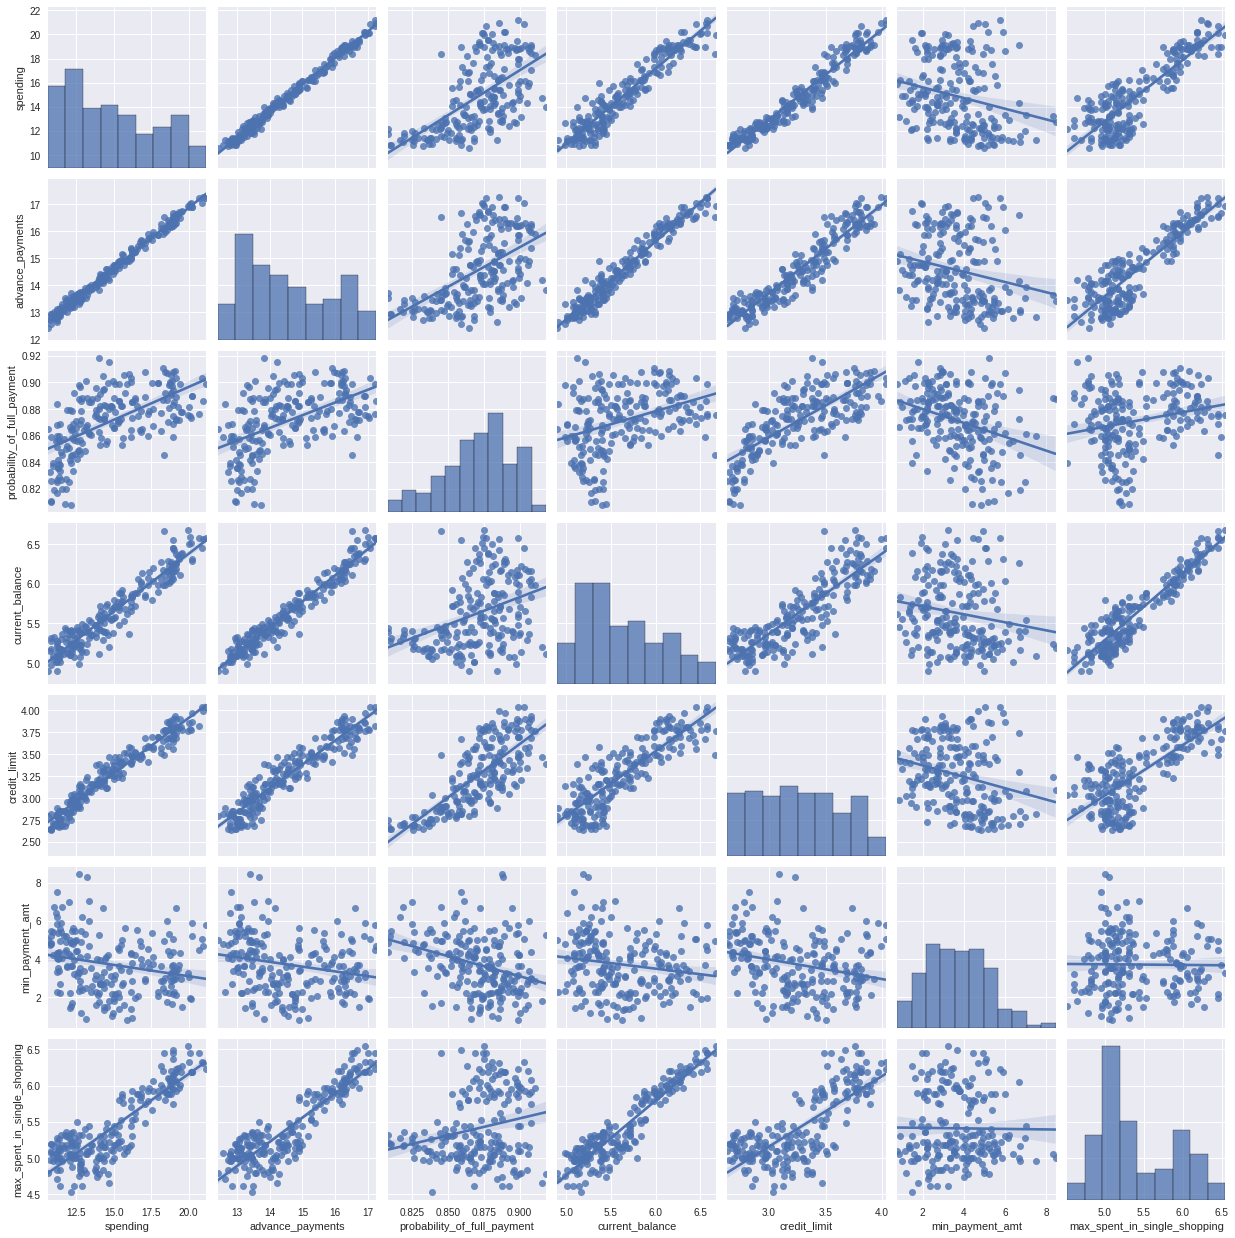

In [10]:
sns.pairplot(data = rd, kind='reg')
plt.show()

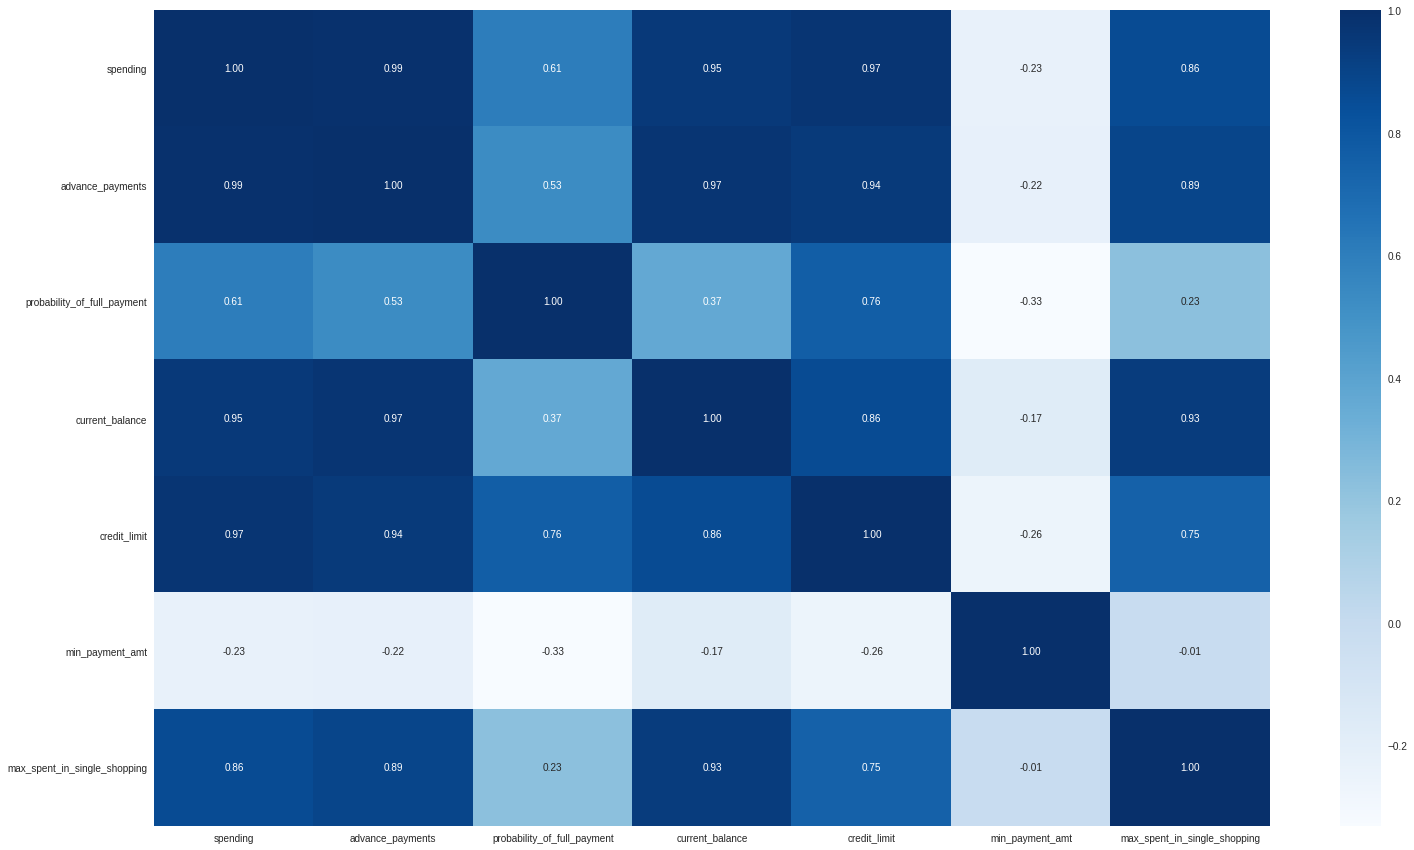

In [11]:
corr = rd.corr(method='pearson')
#mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(rd.corr(), annot=True,fmt='.2f',cmap='Blues')
plt.show()

### **Observations based on Multivariate analysis of the data**

1. **spending** : Has strong positive correlation with all other features except probability_of_full_payment and min_payment_amt
2. **advance_payments** : Similar to spending, it has strong positive correlation with all other features except probability_of_full_payment and min_payment_amt
3. **probability_of_full_payment** : In general, has a weak but positive correlation with all features with the excception of min_payment_amt with which it has strongest negative correlation amongst all the features
4. **current_balance** : Similar to spending, it has strong positive correlation with all other features except probability_of_full_payment and min_payment_amt
5. **credit_limit** : In general, it has strong positive correlation with all other features except min_payment_amt
6. **min_payment_amt** : In general, it has weak negative correlation with all other features except max_spent_in_single_shopping, with which it has almost no correlation
7. **max_spent_in_single_shopping** : Has strong positive correlation with all other features except probability_of_full_payment and min_payment_amt

## **Data pre-processing**

With all the analysis so far, there are 3 things we need to take care of before we can start with the clustering of the data.
1. Treat outliers, if any
2. Originally, the data is scaled down to unit/ten values(as explained in data dictionary section). To be on a safer side we should upscale the data
3. Additionally, we can add another feature to data set called credit_limit_utilization = spending/credit_limit
> This is one of major factors in determining the credit health and spending pattern of customers
4. Followed by step 2, we should then scale down the data using zscore
5. There is very high correlation between spending and advance_payments. It would be worth checking the variation in clusters we get after keeping only one of the 2 features

Text(0.5, 1.0, 'After outlier treatment')

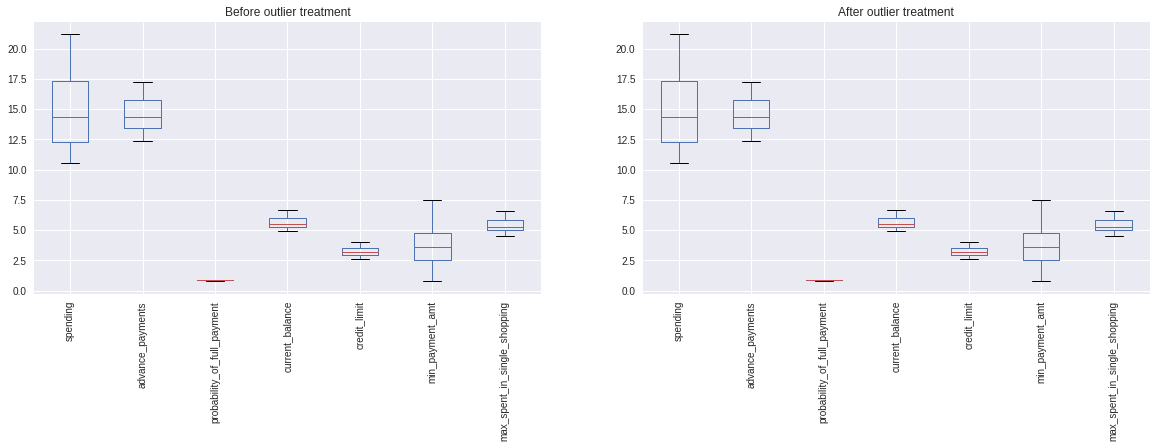

In [12]:
#Step 1: Treat outliers

def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

df = rd

for x in df.columns:
    df[x] = treat_outlier(df[x])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
rd.boxplot(ax=ax1, rot=90)
ax1.set_title('Before outlier treatment')
df.boxplot(ax=ax2, rot=90)
ax2.set_title('After outlier treatment')

In [13]:
#Step 2 :  Scale up data based on data dictionary

#spending, current_balance, max_spent_in_single_shopping to be multiplied by 1000
for x in ['spending', 'current_balance', 'max_spent_in_single_shopping']:
    df[x] = df[x]*1000

#advance_payments, min_payment_amt  to be multiplied by 100
for x in ['advance_payments', 'min_payment_amt']:
    df[x] = df[x]*100

#credit_limit to be multiplied by 10000
df['credit_limit'] = df['credit_limit']*10000

df.sample(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
152,14990.0,1456.0,0.8883,5570.0,33770.0,295.8,5175.0
159,17360.0,1576.0,0.8785,6145.0,35740.0,352.6,5971.0


In [14]:
df['credit_limit_utilization'] = df['spending']/df['credit_limit']

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14847.523810,2909.699431,10590.000000,12270.000000,14355.00000,17305.000000,21180.000000
advance_payments,210.0,1455.928571,130.595873,1241.000000,1345.000000,1432.00000,1571.500000,1725.000000
probability_of_full_payment,210.0,0.871244,0.023061,0.810700,0.856900,0.87345,0.887775,0.918300
current_balance,210.0,5628.533333,443.063478,4899.000000,5262.250000,5523.50000,5979.750000,6675.000000
credit_limit,210.0,32586.047619,3777.144449,26300.000000,29440.000000,32370.00000,35617.500000,40330.000000
min_payment_amt,210.0,367.917524,145.219373,76.510000,256.150000,359.90000,476.875000,752.400000
max_spent_in_single_shopping,210.0,5408.071429,491.480499,4519.000000,5045.000000,5223.00000,5877.000000,6550.000000
credit_limit_utilization,210.0,0.451801,0.038790,0.379978,0.418437,0.44230,0.484304,0.542999


In [16]:
df.sample(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization
159,17360.0,1576.0,0.8785,6145.0,35740.0,352.6,5971.0,0.485730
139,14590.0,1428.0,0.8993,5351.0,33330.0,418.5,4781.0,0.437744


In [17]:
#Step 4 : scaling the data using zscore

from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.sample(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization
49,1.371960,1.328411,0.889162,0.924117,1.399617,-0.777352,0.960473,1.177282
111,-0.178287,-0.214366,0.515345,-0.281745,-0.158181,-0.242402,-0.375419,-0.099453


Text(0.5, 1.0, 'After scaling')

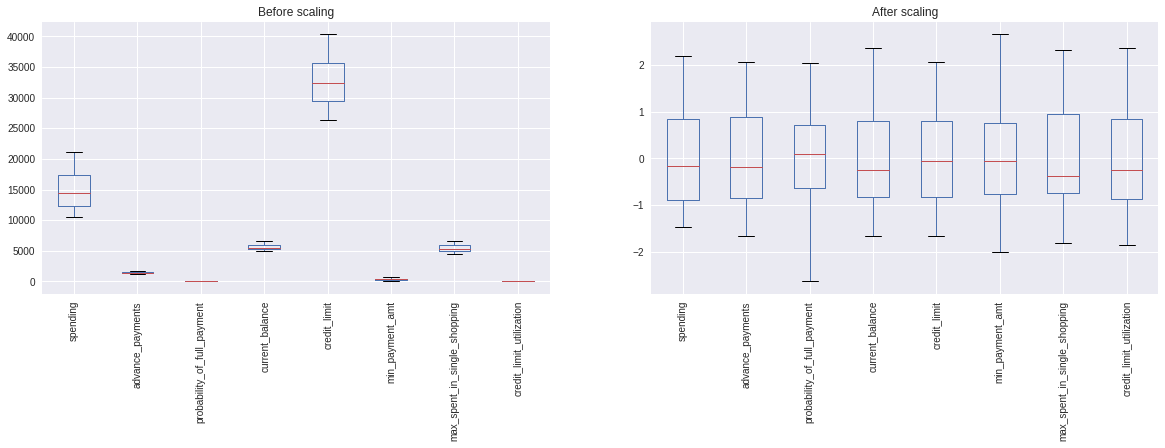

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
rd.boxplot(ax=ax1, rot=90)
ax1.set_title('Before scaling')
df_scaled.boxplot(ax=ax2, rot=90)
ax2.set_title('After scaling')

## **Data is now ready for segmentation via clustering.**

## **Heirarchical Clustering**

single


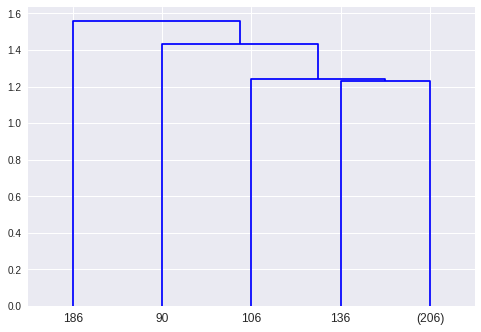



complete


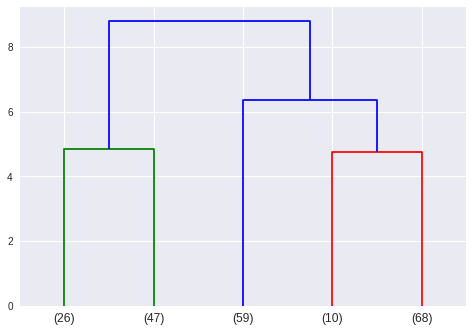



average


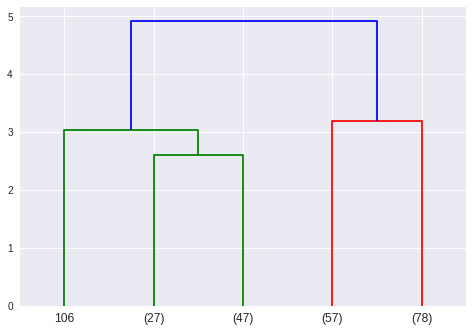



weighted


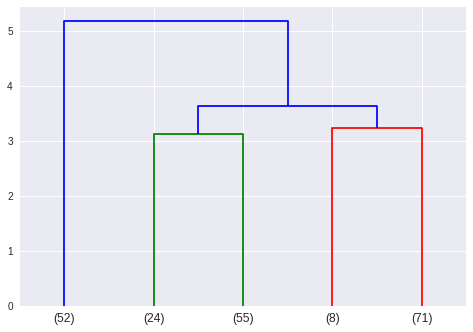



centroid


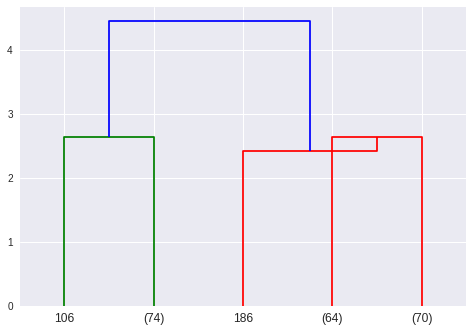



median


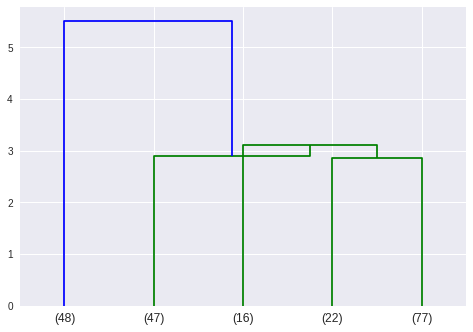



ward


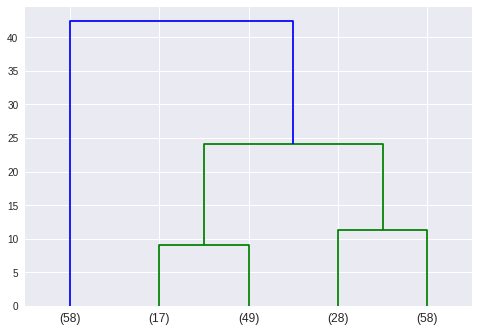

In [19]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage, single, complete, average, weighted, centroid, median, ward, maxdists, is_monotonic
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score

for mtd in ['single','complete','average','weighted','centroid','median','ward']:
    link = linkage(df_scaled, method = mtd)
    print(mtd)
    dend = dendrogram(link,  truncate_mode='lastp',p = 5,)
    plt.show()
    print('\n')

In [20]:
print('With Single linkage method, the linkage is monotonic',is_monotonic(single(pdist(df_scaled))),', with max Euclidean distance between any non-singleton cluster',np.max(maxdists(single(pdist(df_scaled)))))
print('With Complete linkage method, the linkage is monotonic',is_monotonic(complete(pdist(df_scaled))),', with max Euclidean distance between any non-singleton cluster',np.max(maxdists(complete(pdist(df_scaled)))))
print('With Average linkage method, the linkage is monotonic',is_monotonic(average(pdist(df_scaled))),', with max Euclidean distance between any non-singleton cluster',np.max(maxdists(average(pdist(df_scaled)))))
print('With Weighted linkage method, the linkage is monotonic',is_monotonic(weighted(pdist(df_scaled))),', with max Euclidean distance between any non-singleton cluster',np.max(maxdists(weighted(pdist(df_scaled)))))
print('With Centroid linkage method, the linkage is monotonic',is_monotonic(centroid(pdist(df_scaled))),', with max Euclidean distance between any non-singleton cluster',np.max(maxdists(centroid(pdist(df_scaled)))))
print('With Median linkage method, the linkage is monotonic',is_monotonic(median(pdist(df_scaled))),', with max Euclidean distance between any non-singleton cluster',np.max(maxdists(median(pdist(df_scaled)))))
print('With Ward linkage method, the linkage is monotonic',is_monotonic(ward(pdist(df_scaled))),', with max Euclidean distance between any non-singleton cluster',np.max(maxdists(ward(pdist(df_scaled)))))

With Single linkage method, the linkage is monotonic True , with max Euclidean distance between any non-singleton cluster 1.558283444405491
With Complete linkage method, the linkage is monotonic True , with max Euclidean distance between any non-singleton cluster 8.793921950418202
With Average linkage method, the linkage is monotonic True , with max Euclidean distance between any non-singleton cluster 4.915262557998184
With Weighted linkage method, the linkage is monotonic True , with max Euclidean distance between any non-singleton cluster 5.180675706744161
With Centroid linkage method, the linkage is monotonic False , with max Euclidean distance between any non-singleton cluster 4.454246020886755
With Median linkage method, the linkage is monotonic False , with max Euclidean distance between any non-singleton cluster 5.504184799694487
With Ward linkage method, the linkage is monotonic True , with max Euclidean distance between any non-singleton cluster 42.43271282575692


**Going with 2 clusters**

---


We can see Ward method has the maximum distance between the suggested clusters. The distance is measured using Euclidean distance. Let us compare the accuracy score with Agglomerative clustering using manhattan distance and average method of distance calculation.

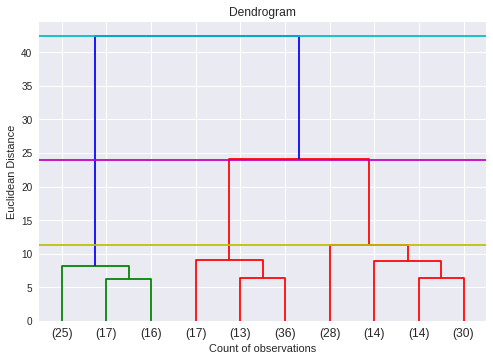

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       2, 3, 2, 1, 2, 3, 3, 1, 1, 2, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 2, 1, 3,
       1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2], dtype=int32)

In [21]:
k = 3

link = linkage(df_scaled, method = 'ward')
dend = dendrogram(link, truncate_mode='lastp', p = 10)
plt.axhline(y=11.3,color='y')
plt.axhline(y=24,color='m')
plt.axhline(y=42.43,color='c')
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')
plt.xlabel('Count of observations')
plt.show()

clusters = fcluster(link, k, criterion='maxclust')
clusters

###### Storing the silhouette scores in a dataframe

To be used to compare with the scores of K Means clusters later

In [22]:
s_c_comparison=pd.DataFrame()
Silhouette_score_from_Hierarchical = []
min_Silhouette_sample_from_Hierarchical = []
for k in [2,3,4,5,6,3]:
    clusters = fcluster(link, k, criterion='maxclust')
    Silhouette_score_from_Hierarchical.append(silhouette_score(df_scaled, clusters))
    min_Silhouette_sample_from_Hierarchical.append(np.min(silhouette_samples(df_scaled, clusters)))
s_c_comparison['n_clusters'] = [2,3,4,5,6,3]
s_c_comparison['Silhouette_score_from_Hierarchical'] = Silhouette_score_from_Hierarchical
s_c_comparison['min_Silhouette_sample_from_Hierarchical'] = min_Silhouette_sample_from_Hierarchical
s_c_comparison = s_c_comparison.drop(index=5)
s_c_comparison

,n_clusters,Silhouette_score_from_Hierarchical,min_Silhouette_sample_from_Hierarchical
0,2,0.467059,-0.424905
1,3,0.382955,-0.198387
2,4,0.305254,-0.337827
3,5,0.256364,-0.337827
4,6,0.263495,-0.336265


In [23]:
Hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Hcluster.fit(df_scaled)

Hcluster.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2,
       2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0,
       1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2])

##### Merging the cluster labels with original data set

In [24]:
H_clusters = pd.DataFrame()

H_clusters['H_clusters'] = clusters

merged_3_cls = pd.merge(left=df,right=H_clusters,left_index=True, right_index=True)

merged_3_cls.head(3)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization,H_clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,0.529896,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0.446399,2
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,0.504660,1


##### Defining the dataset stats based on cluster labels

In [25]:
dp1 = merged_3_cls.groupby('H_clusters').mean()
dp1['freq'] = merged_3_cls.H_clusters.value_counts().sort_index()
dp1.T

H_clusters,1,2,3
spending,18815.517241,15032.878788,12029.186047
advance_payments,1634.258621,1463.075758,1330.174419
probability_of_full_payment,0.884671,0.881905,0.854008
current_balance,6227.379310,5617.651515,5233.011628
credit_limit,37304.655172,33298.484848,28856.976744
min_payment_amt,359.436207,284.160758,437.915930
max_spent_in_single_shopping,6084.862069,5259.712121,5065.488372
credit_limit_utilization,0.504288,0.451308,0.416781
freq,58.000000,66.000000,86.000000


In [26]:
merged_3_cls[merged_3_cls.H_clusters==1].describe().T

,count,mean,std,min,25%,50%,75%,max
spending,58.0,18815.517241,1038.795139,16770.00000,18277.50000,18865.000000,19277.500000,21180.000000
advance_payments,58.0,1634.258621,44.046451,1551.00000,1606.00000,1629.000000,1662.500000,1725.000000
probability_of_full_payment,58.0,0.884671,0.015070,0.84520,0.87470,0.884150,0.898475,0.910800
current_balance,58.0,6227.379310,209.672495,5791.00000,6060.25000,6187.000000,6368.250000,6675.000000
credit_limit,58.0,37304.655172,1497.918106,34030.00000,36420.00000,37635.000000,38147.500000,40330.000000
min_payment_amt,58.0,359.436207,123.209836,147.20000,283.85000,350.150000,443.600000,668.200000
max_spent_in_single_shopping,58.0,6084.862069,209.891488,5661.00000,5922.50000,6056.500000,6221.750000,6550.000000
credit_limit_utilization,58.0,0.504288,0.016614,0.47561,0.48802,0.503313,0.517735,0.542999
H_clusters,58.0,1.000000,0.000000,1.00000,1.00000,1.000000,1.000000,1.000000


In [27]:
merged_3_cls[merged_3_cls.H_clusters==2].describe().T

,count,mean,std,min,25%,50%,75%,max
spending,66.0,15032.878788,925.646161,13500.000000,14300.000000,14955.000000,15667.500000,17120.000000
advance_payments,66.0,1463.075758,44.907533,1383.000000,1428.000000,1460.500000,1490.750000,1555.000000
probability_of_full_payment,66.0,0.881905,0.015353,0.852700,0.872450,0.882000,0.890625,0.918300
current_balance,66.0,5617.651515,194.222196,5119.000000,5479.750000,5643.000000,5760.750000,6053.000000
credit_limit,66.0,33298.484848,1380.784885,31130.000000,32037.500000,33305.000000,34307.500000,36830.000000
min_payment_amt,66.0,284.160758,116.676260,76.510000,200.925000,271.450000,359.650000,559.300000
max_spent_in_single_shopping,66.0,5259.712121,316.431486,4649.000000,5044.500000,5199.500000,5442.000000,5922.000000
credit_limit_utilization,66.0,0.451308,0.016646,0.409589,0.438979,0.450437,0.465039,0.481894
H_clusters,66.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [28]:
merged_3_cls[merged_3_cls.H_clusters==3].describe().T

,count,mean,std,min,25%,50%,75%,max
spending,86.0,12029.186047,794.756663,10590.000000,11342.500000,12090.000000,12692.500000,14280.000000
advance_payments,86.0,1330.174419,36.783370,1241.000000,1302.500000,1332.500000,1356.500000,1417.000000
probability_of_full_payment,86.0,0.854008,0.021522,0.810700,0.837675,0.855800,0.867600,0.900900
current_balance,86.0,5233.011628,145.876377,4899.000000,5136.250000,5225.000000,5355.250000,5541.000000
credit_limit,86.0,28856.976744,1568.613528,26300.000000,27630.000000,28645.000000,29927.500000,32980.000000
min_payment_amt,86.0,437.915930,144.255080,85.510000,352.350000,442.000000,537.475000,752.400000
max_spent_in_single_shopping,86.0,5065.488372,198.599434,4519.000000,4961.500000,5063.000000,5191.750000,5491.000000
credit_limit_utilization,86.0,0.416781,0.013485,0.379978,0.407917,0.415324,0.427676,0.442353
H_clusters,86.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [29]:
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization
0,19940.0,1692.0,0.875200,6675.0,37630.0,325.2,6550.0,0.529896
1,15990.0,1489.0,0.906400,5363.0,35820.0,333.6,5144.0,0.446399
2,18950.0,1642.0,0.882900,6248.0,37550.0,336.8,6148.0,0.504660
3,10830.0,1296.0,0.825915,5278.0,26410.0,518.2,5185.0,0.410072
4,17990.0,1586.0,0.899200,5890.0,36940.0,206.8,5837.0,0.487006
...,...,...,...,...,...,...,...,...
205,13890.0,1402.0,0.888000,5439.0,31990.0,398.6,4738.0,0.434198
206,16770.0,1562.0,0.863800,5927.0,34380.0,492.0,5795.0,0.487784
207,14030.0,1416.0,0.879600,5438.0,32010.0,171.7,5001.0,0.438301
208,16120.0,1500.0,0.900000,5709.0,34850.0,227.0,5443.0,0.462554


## **K-Means clustering**

[713.5482840539968, 470.13329176558193, 399.1936658415256, 354.72647094888856, 319.07836490520526, 283.6521345773062, 263.15060340627457, 241.48694815245275]


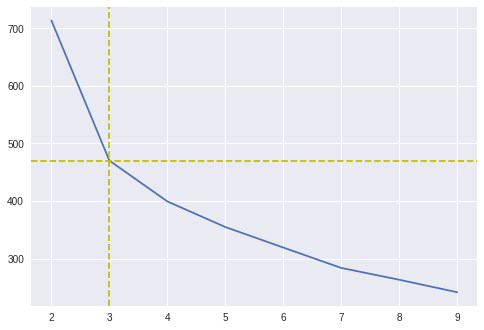

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

x = StandardScaler()

df_scaled = x.fit_transform(df)

wss = []

for i in range(2,10):
    k_means = KMeans(n_clusters=i,random_state = 1)
    k_means.fit(df_scaled)
    wss.append(k_means.inertia_)

KMCluster = k_means.labels_

print(wss)

plt.plot(range(2,10), wss)
plt.axhline(y=470.13329176558193,color='y', linestyle = '--')
plt.axvline(x=3,color='y', linestyle = '--')

In [53]:
k_means = KMeans(n_clusters=3,random_state = 1)
k_means.fit(df_scaled)

KMCluster = k_means.labels_

print('minimum Silhouette samples for 3 clusters :',silhouette_samples(df_scaled, KMCluster).min())
print('Silhouette score for 3 clusters :',silhouette_score(df_scaled, KMCluster))

minimum Silhouette samples for 3 clusters : -0.02166614256080289
Silhouette score for 3 clusters : 0.4026533904550282


In [54]:
k_means = KMeans(n_clusters=2,random_state = 1)
k_means.fit(df_scaled)

KMCluster = k_means.labels_

print('minimum Silhouette samples for 2 clusters :',silhouette_samples(df_scaled, KMCluster).min())
print('Silhouette score for 2 clusters :',silhouette_score(df_scaled, KMCluster))

minimum Silhouette samples for 2 clusters : 0.017826433175267616
Silhouette score for 2 clusters : 0.4822972274700278


In [55]:
k_means = KMeans(n_clusters=4,random_state = 1)
k_means.fit(df_scaled)

KMCluster = k_means.labels_

print('minimum Silhouette samples for 4 clusters :',silhouette_samples(df_scaled, KMCluster).min())
print('Silhouette score for 4 clusters :',silhouette_score(df_scaled, KMCluster))

minimum Silhouette samples for 4 clusters : -0.005400232101598023
Silhouette score for 4 clusters : 0.3293145168772806


In [32]:
k_means = KMeans(n_clusters=3,random_state = 1)
k_means.fit(df_scaled)

KM_clusters = pd.DataFrame()

KM_clusters['KM_clusters'] = k_means.labels_

merged_KM_3_cls = pd.merge(left=df,right=KM_clusters,left_index=True, right_index=True)

merged_KM_3_cls.head(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization,KM_clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,0.529896,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0.446399,2


In [33]:
dp3 = merged_KM_3_cls.groupby('KM_clusters').mean()
dp3['freq'] = merged_KM_3_cls.KM_clusters.value_counts().sort_index()
dp3

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization,freq
KM_clusters,,,,,,,,,
0,11856.944444,1324.777778,0.848969,5231.750000,28495.416667,468.106389,5101.722222,0.416057,72
1,18527.121212,1622.181818,0.883726,6184.803030,36974.696970,358.818182,6048.606061,0.500788,66
2,14465.138889,1434.680556,0.882078,5515.402778,32653.750000,276.069722,5127.263889,0.442640,72


For n_clusters = 2 The average silhouette_score is : 0.4822972274700278
For n_clusters = 3 The average silhouette_score is : 0.4027167895955469
For n_clusters = 4 The average silhouette_score is : 0.3293145168772806
For n_clusters = 5 The average silhouette_score is : 0.2932687837880769
For n_clusters = 6 The average silhouette_score is : 0.2857251326860216


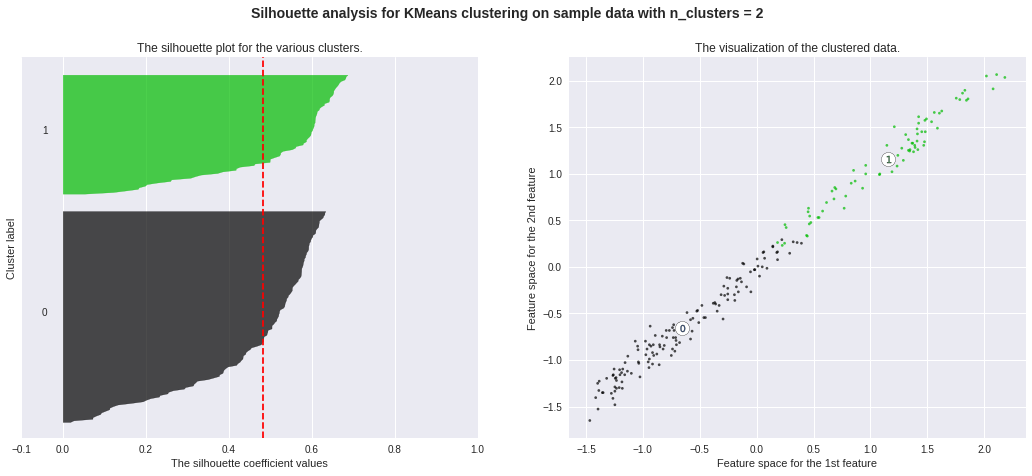

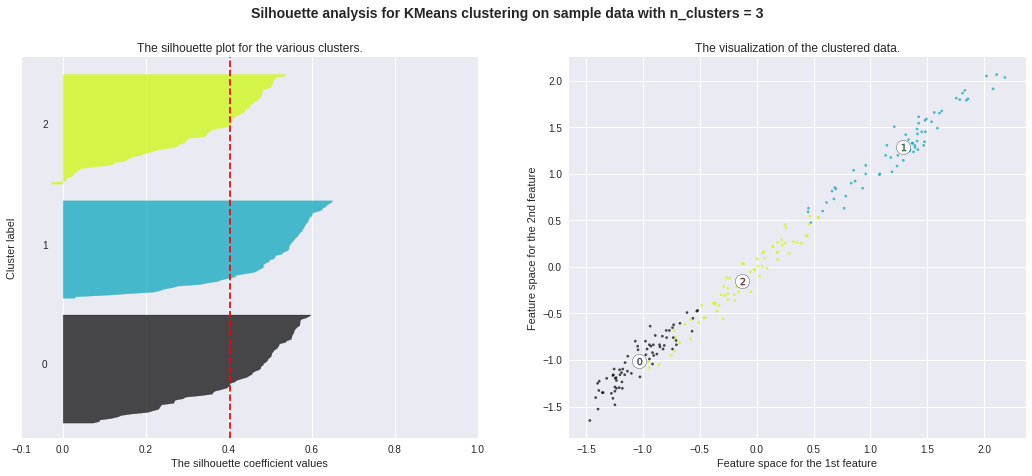

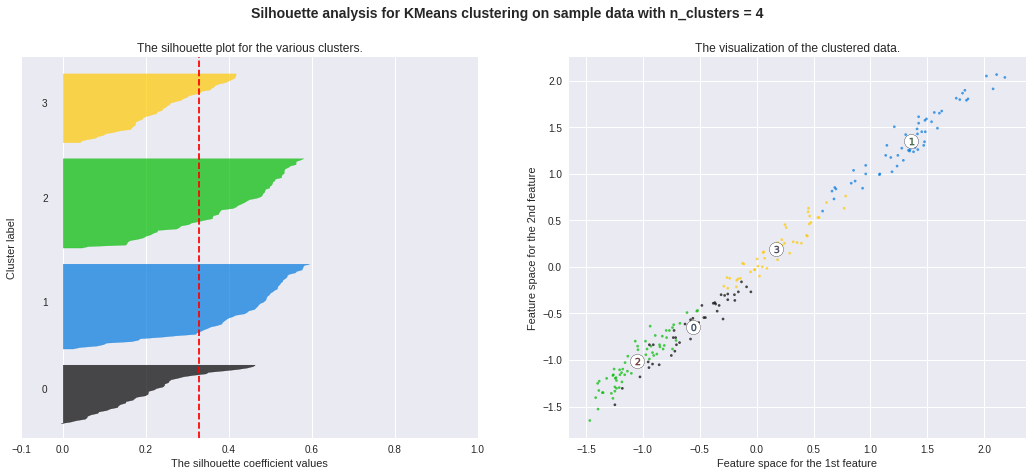

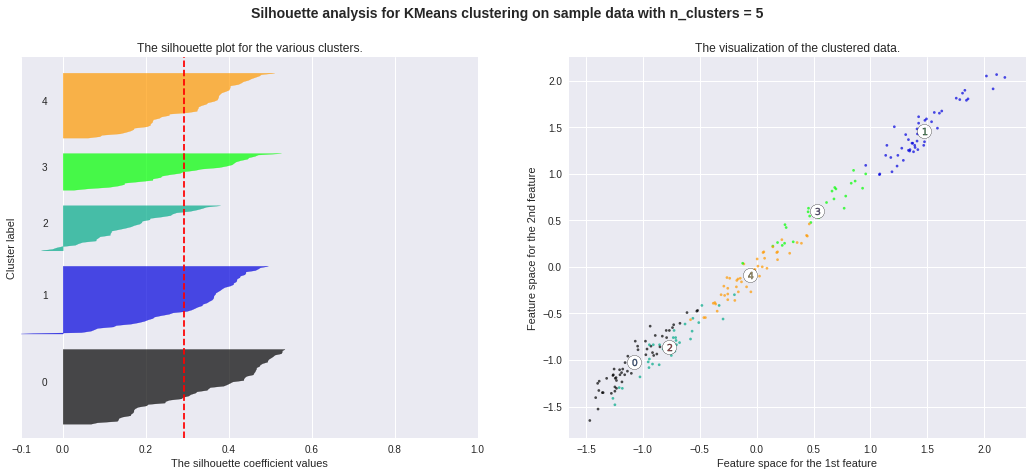

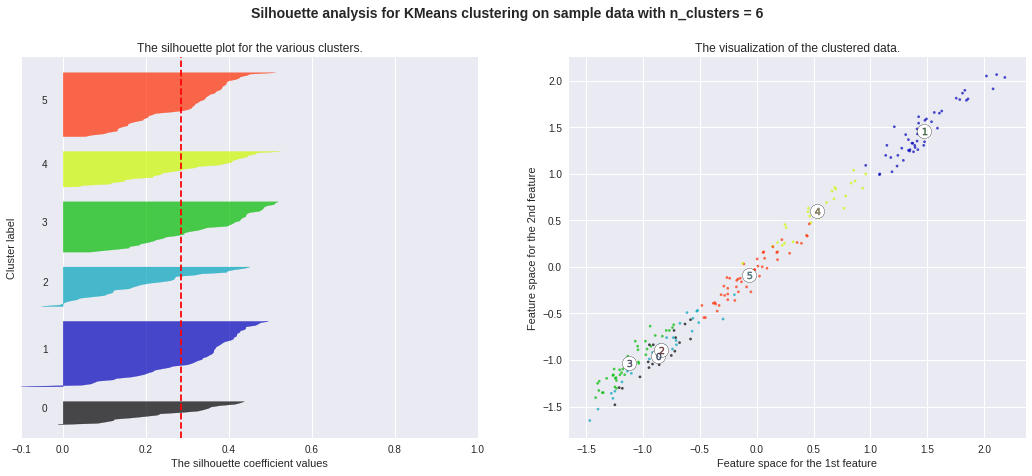

,n_clusters,Silhouette_score_from_Hierarchical,min_Silhouette_sample_from_Hierarchical,Silhouette_score_from_KMeans,min_Silhouette_sample_from_KMeans
0,2,0.467059,-0.424905,0.482297,0.017826
1,3,0.382955,-0.198387,0.402717,-0.029600
2,4,0.305254,-0.337827,0.329315,-0.005400
3,5,0.256364,-0.337827,0.293269,-0.103778
4,6,0.263495,-0.336265,0.285725,-0.103778


In [34]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]
Silhouette_score_from_KMeans = []
min_Silhouette_sample_from_KMeans = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    Silhouette_score_from_KMeans.append(silhouette_score(df_scaled, cluster_labels))
    min_Silhouette_sample_from_KMeans.append(np.min(silhouette_samples(df_scaled, cluster_labels)))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_scaled[:, 0], df_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

s_c_comparison['Silhouette_score_from_KMeans'] = Silhouette_score_from_KMeans
s_c_comparison['min_Silhouette_sample_from_KMeans'] = min_Silhouette_sample_from_KMeans
s_c_comparison

In [35]:
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization
0,19940.0,1692.0,0.875200,6675.0,37630.0,325.2,6550.0,0.529896
1,15990.0,1489.0,0.906400,5363.0,35820.0,333.6,5144.0,0.446399
2,18950.0,1642.0,0.882900,6248.0,37550.0,336.8,6148.0,0.504660
3,10830.0,1296.0,0.825915,5278.0,26410.0,518.2,5185.0,0.410072
4,17990.0,1586.0,0.899200,5890.0,36940.0,206.8,5837.0,0.487006
...,...,...,...,...,...,...,...,...
205,13890.0,1402.0,0.888000,5439.0,31990.0,398.6,4738.0,0.434198
206,16770.0,1562.0,0.863800,5927.0,34380.0,492.0,5795.0,0.487784
207,14030.0,1416.0,0.879600,5438.0,32010.0,171.7,5001.0,0.438301
208,16120.0,1500.0,0.900000,5709.0,34850.0,227.0,5443.0,0.462554


## Removing one of the highly correlated features

In [36]:
#Step 4 : scaling the data using zscore

from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled1 = df_scaled.drop(['advance_payments','credit_limit_utilization','probability_of_full_payment'],axis=1)
df_scaled1.sample(2)

,spending,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
72,1.809475,2.154866,1.396963,-1.190127,2.123006
97,0.452147,0.489735,0.361970,0.405061,0.789153


In [37]:
df_scaled.sample(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization
39,1.60622,1.650782,0.293663,1.668449,1.439424,-0.495037,1.58457,1.588869
14,-0.94652,-1.081698,0.350170,-1.184445,-0.842869,-1.020323,-0.71806,-1.043390


single


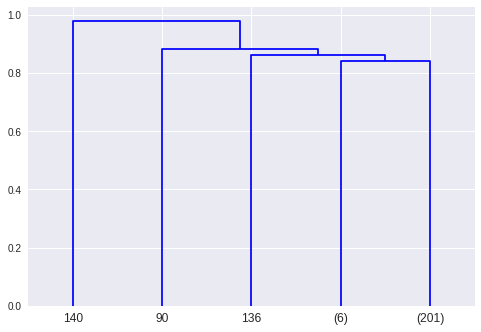



complete


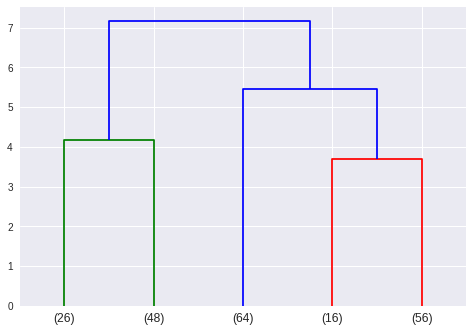



average


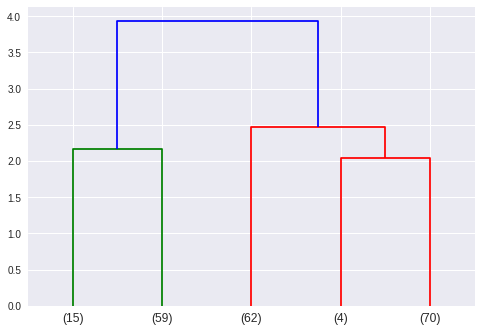



weighted


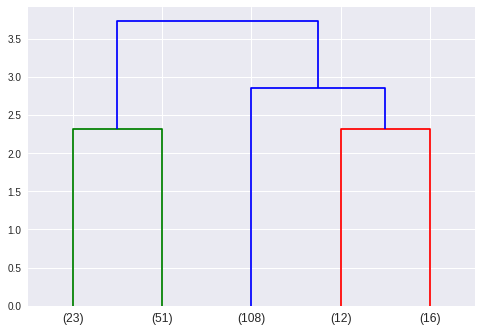



centroid


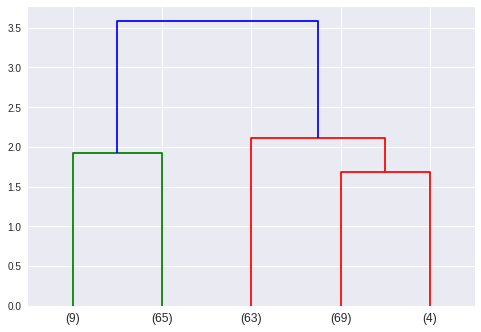



median


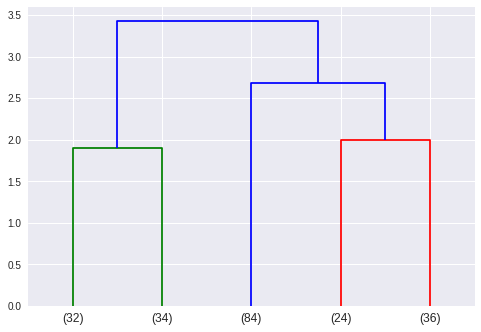



ward


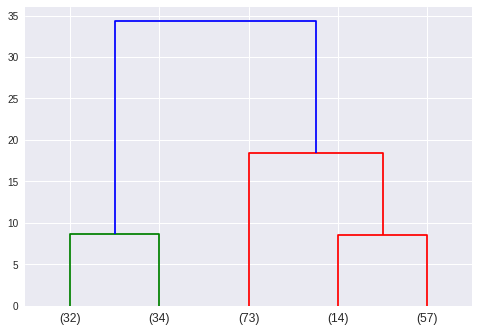

In [38]:
for mtd in ['single','complete','average','weighted','centroid','median','ward']:
    link = linkage(df_scaled1, method = mtd)
    print(mtd)
    dend = dendrogram(link,  truncate_mode='lastp',p = 5,)
    plt.show()
    print('\n')

In [39]:
print('Single :',is_monotonic(single(pdist(df_scaled1))),np.max(maxdists(single(pdist(df_scaled1)))))
print('complete :',is_monotonic(complete(pdist(df_scaled1))),np.max(maxdists(complete(pdist(df_scaled1)))))
print('average :',is_monotonic(average(pdist(df_scaled1))),np.max(maxdists(average(pdist(df_scaled1)))))
print('weighted :',is_monotonic(weighted(pdist(df_scaled1))),np.max(maxdists(weighted(pdist(df_scaled1)))))
print('centroid :',is_monotonic(centroid(pdist(df_scaled1))),np.max(maxdists(centroid(pdist(df_scaled1)))))
print('median :',is_monotonic(median(pdist(df_scaled1))),np.max(maxdists(median(pdist(df_scaled1)))))
print('ward :',is_monotonic(ward(pdist(df_scaled1))),np.max(maxdists(ward(pdist(df_scaled1)))))

Single : True 0.9782618031512732
complete : True 7.163290535139952
average : True 3.934032468204382
weighted : True 3.7308616469469045
centroid : False 3.5836414521103404
median : False 3.426645537110273
ward : True 34.33716978586546


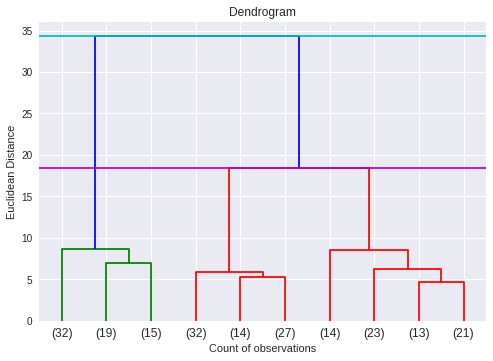

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 2, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 2, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 2, 1, 3, 3, 3], dtype=int32)

In [40]:
k = 3

link = linkage(df_scaled1, method = 'ward')
dend = dendrogram(link, truncate_mode='lastp', p = 10)
plt.axhline(y=18.4,color='m')
plt.axhline(y=34.33,color='c')
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')
plt.xlabel('Count of observations')
plt.show()

clusters_test = fcluster(link, k, criterion='maxclust')
clusters_test

In [41]:
import sklearn.metrics as sm
sm.accuracy_score(clusters,clusters_test)

0.36666666666666664

In [42]:
link = linkage(df_scaled1, method = 'ward')
s_c_comparison_test=pd.DataFrame()
Silhouette_score_from_Hierarchical = []
min_Silhouette_sample_from_Hierarchical = []
for k in [2,3,4,5,6,3]:
    clusters_test = fcluster(link, k, criterion='maxclust')
    Silhouette_score_from_Hierarchical.append(silhouette_score(df_scaled1, clusters_test))
    min_Silhouette_sample_from_Hierarchical.append(np.min(silhouette_samples(df_scaled1, clusters_test)))
s_c_comparison_test['n_clusters'] = [2,3,4,5,6,3]
s_c_comparison_test['Silhouette_score_from_Hierarchical'] = Silhouette_score_from_Hierarchical
s_c_comparison_test['min_Silhouette_sample_from_Hierarchical'] = min_Silhouette_sample_from_Hierarchical
s_c_comparison_test = s_c_comparison_test.drop(index=5)
s_c_comparison_test

,n_clusters,Silhouette_score_from_Hierarchical,min_Silhouette_sample_from_Hierarchical
0,2,0.489062,-0.422531
1,3,0.419715,-0.241910
2,4,0.359337,-0.368221
3,5,0.322230,-0.384553
4,6,0.330586,-0.384553


In [43]:
H_clusters = pd.DataFrame()

H_clusters['H_clusters'] = clusters_test

merged_3_cls_test = pd.merge(left=df,right=H_clusters,left_index=True, right_index=True)

merged_3_cls_test.head(3)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization,H_clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,0.529896,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0.446399,3
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,0.504660,1


In [44]:
dp1_test = merged_3_cls_test.groupby('H_clusters').mean()
dp1_test['freq'] = merged_3_cls_test.H_clusters.value_counts().sort_index()
dp1_test

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization,freq
H_clusters,,,,,,,,,
1,18473.333333,1619.696970,0.883680,6178.742424,36921.969697,370.739394,6045.606061,0.499932,66
2,12039.315068,1332.027397,0.852065,5249.671233,28794.520548,486.266575,5105.123288,0.417921,73
3,14364.366197,1431.084507,0.879403,5506.605634,32453.802817,243.611549,5126.915493,0.441894,71


[433.77253506103534, 279.0634549091799, 231.92139672955042, 199.3084258303495, 170.63973060017366, 153.6129509026885, 137.89002405814753, 127.15707359101674]


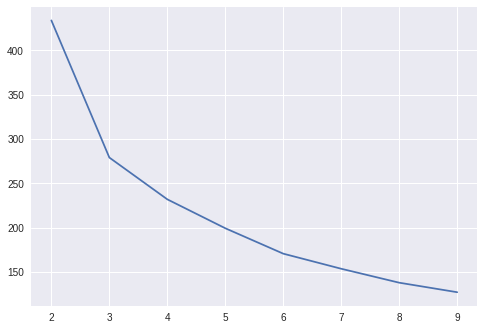

In [45]:
x = StandardScaler()

df_test = df.drop(['advance_payments','credit_limit_utilization','probability_of_full_payment'],axis=1)

df_scaled1 = x.fit_transform(df_test)

wss = []

for i in range(2,10):
    k_means = KMeans(n_clusters=i,random_state = 1)
    k_means.fit(df_scaled1)
    wss.append(k_means.inertia_)

KMCluster = k_means.labels_

print(wss)

plt.plot(range(2,10), wss)

In [46]:
k_means = KMeans(n_clusters=3,random_state = 1)
k_means.fit(df_scaled1)

KMCluster = k_means.labels_

print('Silhouette samples for 3 clusters :',silhouette_samples(df_scaled1, KMCluster).min())
print('Silhouette score for 3 clusters :',silhouette_score(df_scaled1, KMCluster))

Silhouette samples for 3 clusters : -0.04348380417563551
Silhouette score for 3 clusters : 0.4325125920051422


In [47]:
k_means = KMeans(n_clusters=3,random_state = 1)
k_means.fit(df_scaled1)

KM_clusters = pd.DataFrame()

KM_clusters['KM_clusters'] = k_means.labels_

merged_KM_3_cls_test = pd.merge(left=df,right=KM_clusters,left_index=True, right_index=True)

merged_KM_3_cls_test.head(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization,KM_clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,0.529896,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0.446399,2


In [48]:
dp3_test = merged_KM_3_cls_test.groupby('KM_clusters').mean()
dp3_test['freq'] = merged_KM_3_cls_test.KM_clusters.value_counts().sort_index()
dp3_test

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_limit_utilization,freq
KM_clusters,,,,,,,,,
0,11980.571429,1328.528571,0.852375,5234.728571,28746.857143,493.053714,5090.971429,0.416552,70
1,18366.285714,1615.057143,0.883534,6163.600000,36804.285714,364.545714,6028.514286,0.498588,70
2,14195.714286,1424.200000,0.877823,5487.271429,32207.000000,246.153143,5104.728571,0.440263,70


For n_clusters = 2 The average silhouette_score is : 0.5028891617905386
For n_clusters = 3 The average silhouette_score is : 0.4325125920051422
For n_clusters = 4 The average silhouette_score is : 0.3660368261649234
For n_clusters = 5 The average silhouette_score is : 0.3163423028191909
For n_clusters = 6 The average silhouette_score is : 0.32174769388742147


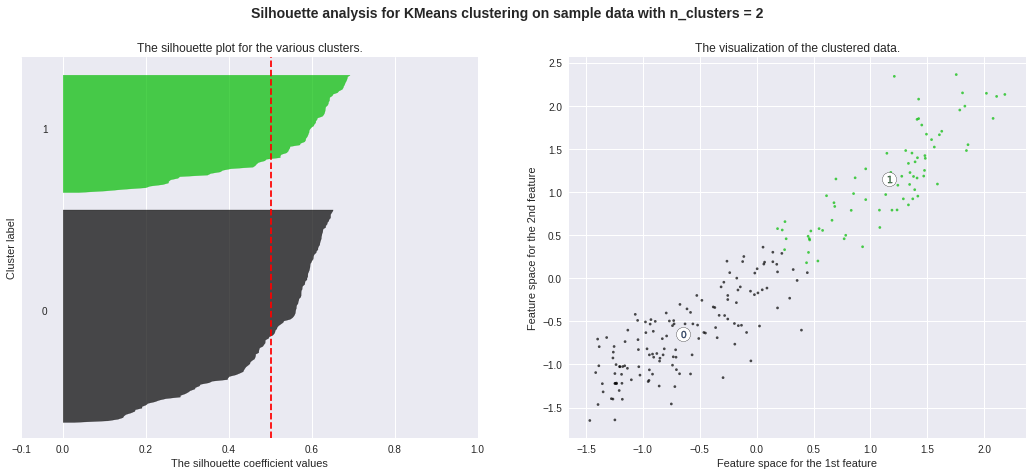

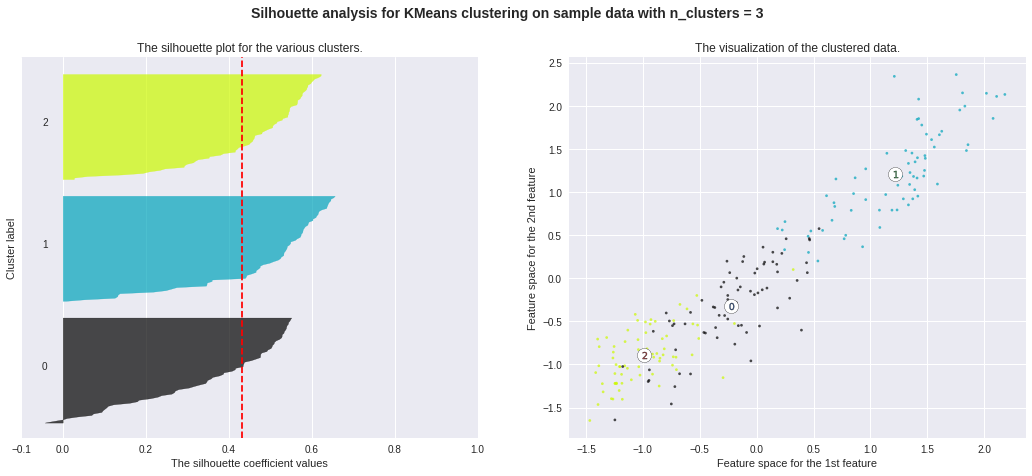

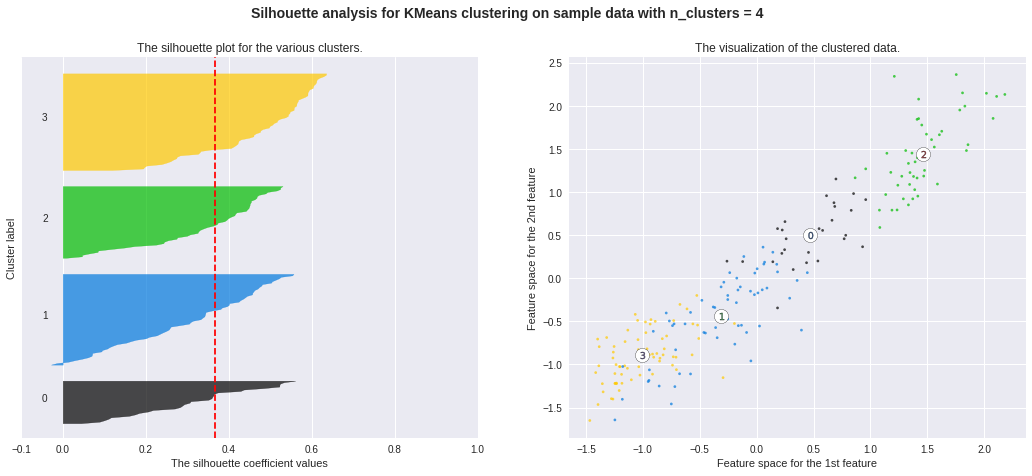

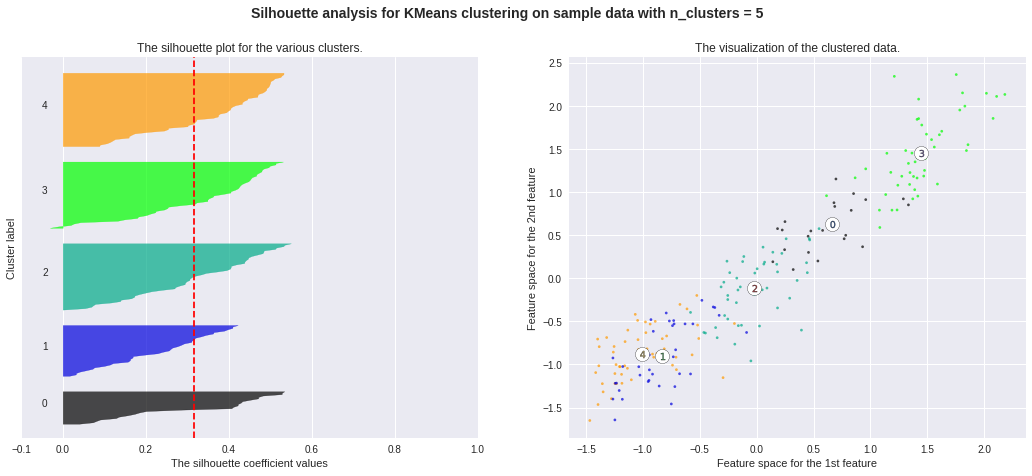

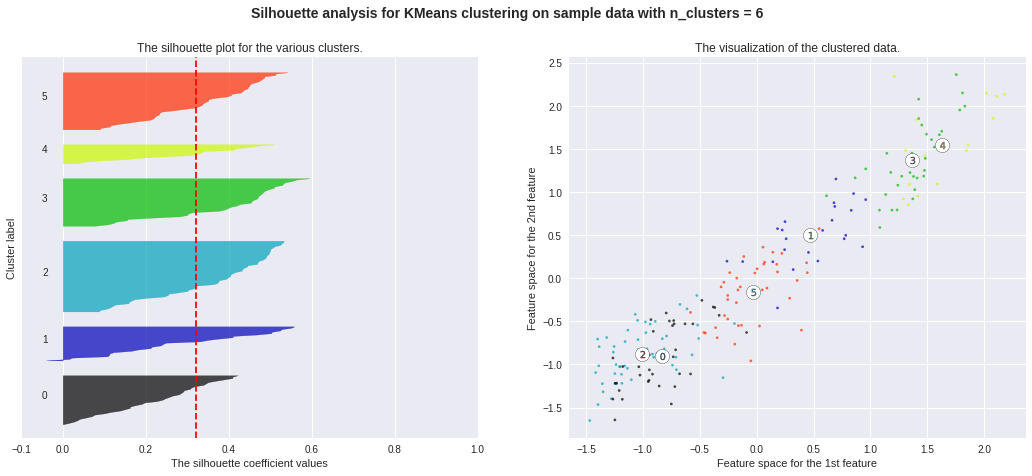

,n_clusters,Silhouette_score_from_Hierarchical,min_Silhouette_sample_from_Hierarchical,Silhouette_score_from_KMeans,min_Silhouette_sample_from_KMeans
0,2,0.489062,-0.422531,0.502889,0.026742
1,3,0.419715,-0.241910,0.432513,-0.043484
2,4,0.359337,-0.368221,0.366037,-0.028324
3,5,0.322230,-0.384553,0.316342,-0.031004
4,6,0.330586,-0.384553,0.321748,-0.039276


In [49]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]
Silhouette_score_from_KMeans = []
min_Silhouette_sample_from_KMeans = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_scaled1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_scaled1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    Silhouette_score_from_KMeans.append(silhouette_score(df_scaled1, cluster_labels))
    min_Silhouette_sample_from_KMeans.append(np.min(silhouette_samples(df_scaled1, cluster_labels)))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_scaled1[:, 0], df_scaled1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

s_c_comparison_test['Silhouette_score_from_KMeans'] = Silhouette_score_from_KMeans
s_c_comparison_test['min_Silhouette_sample_from_KMeans'] = min_Silhouette_sample_from_KMeans
s_c_comparison_test